In [26]:
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'

%matplotlib inline

import csv
import re
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import warnings
from csv_reader import read_csv
from aux import set_smallest_n_zero
from disp import set_font_size, get_ordered_colors
from copy import deepcopy as copy
from analysis_tools import *
from pathlib import Path
from csv_reader import read_csv
from csv_writer import write_csv
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import glob

new_rc_params = {
    'text.usetex': False,
    "svg.fonttype": 'none'
}
matplotlib.rcParams.update(new_rc_params)

plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2.0

warnings.filterwarnings('ignore')

In [36]:
def sort_key(s):
    idx_loc = s.find('INDEX_') + 6
    s_trunc = s[idx_loc:]
    return s_trunc

def plot_param_sweep(file_regex, shape, x_tick_labels=None, y_tick_labels=None, y_label='', x_label='', vmax=1000, scale=1, verbose=False):
    loss_fig, loss_axs = plt.subplots(1, 1, figsize=(3 * scale, 3 * scale), sharex=True, sharey=True)

    all_losses = []
    coefs_matrix = []
    all_sort_keys = []

    for f_idx, file_name in enumerate(sorted(glob.glob(file_regex), key=sort_key)):
        if verbose:
            print(sort_key(file_name))
        all_sort_keys.append(sort_key(file_name))

        loss_data_path = f'{file_name}/train_data.csv'
        loss_data = read_csv(loss_data_path, read_header=False)
        if verbose:
            print(np.array(loss_data[loss_data.columns[2:7]]))
        all_losses.append(np.median(np.array(loss_data[loss_data.columns[2:7]])))


    all_losses = np.array(all_losses).reshape(shape[0], shape[1])
    all_sort_keys = np.array(all_sort_keys).reshape(shape[0], shape[1])
    cbar = loss_axs.matshow(all_losses, vmin=0, vmax=1000, cmap='hot')
    plt.colorbar(cbar, ax=loss_axs)
    loss_axs.set_ylabel(y_label)
    loss_axs.set_xlabel(x_label)

    loss_axs.set_xticks(np.arange(len(x_tick_labels)))
    loss_axs.set_xticklabels([str(l) for l in x_tick_labels], rotation=55, ha='left')
    loss_axs.set_yticks(np.arange(len(y_tick_labels)))
    loss_axs.set_yticklabels([str(l) for l in y_tick_labels])
    
    return all_losses
    
    
#     k_fig.text(0.5, 0.06, 'STDP time const', ha='center')
#     k_fig.text(0.06, 0.5, 'STDP coef', va='center', rotation='vertical')

# Transitions in input parameters

0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.05_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.001_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.15_T_I_0.002_A_F_0.15_T_F_0.002_2024-09-13_14:26:04.645995
[[24624.98931638   901.28198597   903.54791861   796.85940891
   2794.51295031]]
0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.05_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.001_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.15_T_I_0.002_A_F_0.15_T_F_0.003_2024-09-13_14:33:55.410224
[[135321.5078607    2408.83170052   1599.71692566   5269.7648145
   35873.37664511]]
0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.05_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.001_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.15_T_I_0.002_A_F_0.1_T_F_0.002_2024-09-13_14:08:45.804762
[[2032.15382108 1000.09190208 1004.32169748 1048.60744929 1003.17660352]]
0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.05_INH_RULE_SETPOINT_0.4_INH_RUL

array([[ 903.54791861, 5269.7648145 , 1004.32169748, 3202.09251565],
       [1002.18279324,   37.11765296, 1018.85873785,  579.36264786],
       [1002.55554517, 1002.55554517, 1002.55554517, 1002.55554517],
       [ 835.92820184,  268.9095774 , 1075.60676687,  184.74911301]])

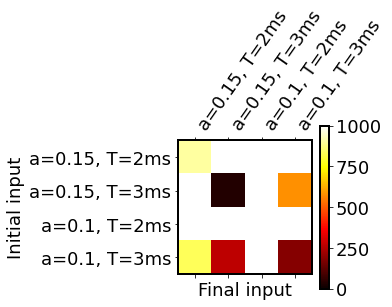

In [41]:
file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.05_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.001_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    y_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    x_label='Final input',
    y_label='Initial input',
    verbose=True
)

0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.05_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.1_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.15_T_I_0.001_A_F_0.15_T_F_0.001_2024-09-12_17:23:33.385877
[[23.9020071  19.4438553  18.39848958 17.89946625 16.28303826]]
0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.05_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.1_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.15_T_I_0.001_A_F_0.15_T_F_0.003_2024-09-12_17:29:30.673140
[[104.23305566 107.30783323 164.15913722 208.06609892  80.17468657]]
0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.05_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.1_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.15_T_I_0.001_A_F_0.1_T_F_0.001_2024-09-12_18:10:51.849513
[[165.2883154  170.8066581  337.0333894  227.9636069  473.31742081]]
0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.05_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.1_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1

array([[  18.39848958,  107.30783323,  227.9636069 ,   85.56960366],
       [  35.28544431,   18.82139072, 1192.55566336,   75.81848195],
       [1093.4842983 , 3129.43913055,  294.07940895, 3350.30033602],
       [  46.85077636,   43.24882757, 1313.91420253,   14.36519471]])

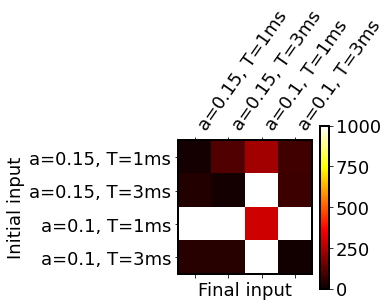

In [14]:
file_regex = './sims_out/2MC_strong_inh_v2*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.05_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.1_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.15, T=1ms', 'a=0.15, T=3ms', 'a=0.1, T=1ms', 'a=0.1, T=3ms'],
    y_tick_labels=['a=0.15, T=1ms', 'a=0.15, T=3ms', 'a=0.1, T=1ms', 'a=0.1, T=3ms'],
    x_label='Final input',
    y_label='Initial input',
    verbose=True
)

0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_A_I_0.3_T_I_0.005_A_F_0.3_T_F_0.005_2024-09-10_00:09:56.313577
[[12.65874571 15.49640927 33.59275719 12.89326004 10.90964588]]
0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_A_I_0.3_T_I_0.005_A_F_0.3_T_F_0.007_2024-09-10_00:16:36.086917
[[38.48992756 54.15500903 38.67216895 51.76670512 44.08837908]]
0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_A_I_0.3_T_I_0.005_A_F_0.6_T_F_0.005_2024-09-10_00:23:29.431167
[[20.77186484 41.52968017 50.51912055 27.62346233 26.95168887]]
0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_A_I_0.3_T_I_0.005_A_F_0.6_T

array([[ 12.89326004,  44.08837908,  27.62346233,  39.22776868],
       [ 43.90176771,  11.31644764,  33.63818912,  24.45196338],
       [106.89637874,  76.80403739,  14.02760177,  19.37306197],
       [ 89.57502416, 139.1125701 ,  26.17206536,  13.45492398]])

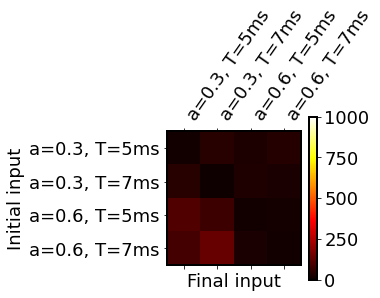

In [26]:
file_regex = './sims_out/2MC_reduced_*SEED_2_*_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    y_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
    verbose=True
)

## Two moment control

0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.1_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.1_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.3_T_I_0.004_A_F_0.3_T_F_0.004_2024-09-12_03:51:56.969249
[[ 8.43130543e+01  1.00000000e-02 -0.00000000e+00  0.00000000e+00
  -1.00000000e-01]]
0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.1_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.1_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.3_T_I_0.004_A_F_0.3_T_F_0.007_2024-09-12_03:56:55.536606
[[ 2.0764855e+03  1.0000000e-02 -0.0000000e+00  0.0000000e+00
  -1.0000000e-01]]
0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.1_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.1_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.3_T_I_0.004_A_F_0.6_T_F_0.004_2024-09-12_04:59:18.652610
[[ 8.70583558e+03  1.00000000e-02 -0.00000000e+00  0.00000000e+00
  -1.00000000e-01]]
0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.1_INH_RULE_SETPOINT_0.4_INH_RULE_

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

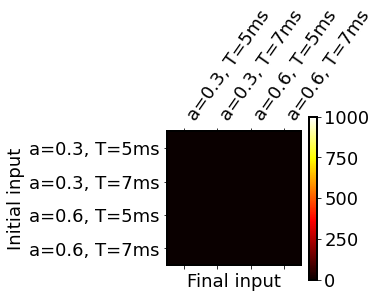

In [5]:
file_regex = './sims_out/2MC_strong_inh_*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.1_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.1_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    y_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
    verbose=True
)

[[24.45596595 27.38901575 44.39237474 16.28045591 14.59485092]]
[[ 389.79275856 3843.1934132   534.95256722  407.38396255  170.53051991]]
[[ 292.54438921 2690.15248517  415.04614367  321.71399966  119.19420771]]
[[ 1682.41221156 18122.21180176  2809.37031295  1971.98440987
    786.35837646]]
[[ 49.37042545  73.46649331 109.24034145  45.10991645  36.20147102]]
[[20.37503737 19.16840271 28.89296929 15.79180708 13.27098932]]
[[69.0598602  45.73552097 76.26926898 36.92774754 29.37988024]]
[[147.45627062  30.02036241 139.67333045  40.42338285  56.87566915]]
[[70.50169801 69.72662296 77.85394168 35.02218007 42.86617863]]
[[56.21105764 47.56246341 33.44739133 14.67411558 21.64206687]]
[[73.59868354 28.50783927 75.22612969 25.57453653 20.0674099 ]]
[[ 84.54871131  28.6529397  111.17017635  24.51953168  26.87760238]]
[[ 89.30801808  89.25864634 133.01563833  55.11411792  50.53604373]]
[[119.77773163  66.6103284   93.39980407  55.62653952  47.75938204]]
[[135.770769    93.24689667 163.5169303   

array([[  24.45596595,  407.38396255,  321.71399966, 1971.98440987],
       [  49.37042545,   19.16840271,   45.73552097,   56.87566915],
       [  69.72662296,   33.44739133,   28.50783927,   28.6529397 ],
       [  89.25864634,   66.6103284 ,   93.24689667,   43.43639813]])

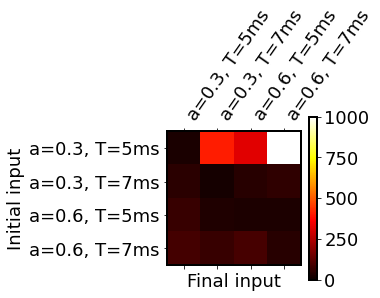

In [3]:
file_regex = './sims_out/2MC_reduced_*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.25_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.001_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    y_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
)

[[1.46255363e+01 1.58053465e+04 5.95001828e+01 1.94281653e+01
  1.42037815e+01]]
[[ 61.54334285 199.97545928 110.31089686  84.78928895  41.60729057]]
[[4.34179389e+01 3.39116911e+06 9.62533100e+01 5.01200716e+01
  4.32304900e+01]]
[[4.91218965e+01 3.47937370e+06 1.06686698e+02 5.52680078e+01
  4.10022432e+01]]
[[ 46.55844632  62.05254453 123.16073475  48.61000922  42.87259   ]]
[[19.71317447 30.90034713 71.01645482 23.05520668 19.14990558]]
[[100.00220417 111.78536384 188.4583465   99.37930264  93.67557073]]
[[ 92.80703433 109.87107913 187.71082159  91.18507732  89.01857552]]
[[18.38484309 31.05330855 54.85082969 26.9804581  28.90950546]]
[[14.60777201 30.8449355  57.34802092 23.53501355 22.99702159]]
[[39.63019694 51.8458056  79.36995866 42.59729257 42.22513432]]
[[69.45356473 32.18125008 61.51452523 27.39338607 24.92480193]]
[[17.69258807 24.7673024  59.89421425 24.45492318 25.23026372]]
[[13.47732195 18.43572137 55.61700787 17.29611539 19.29616873]]
[[ 64.08422318  81.17805425 176.2

array([[ 19.42816534,  84.78928895,  50.12007158,  55.26800777],
       [ 48.61000922,  23.05520668, 100.00220417,  92.80703433],
       [ 28.90950546,  23.53501355,  42.59729257,  32.18125008],
       [ 24.7673024 ,  18.43572137,  65.7742208 ,  50.31552532]])

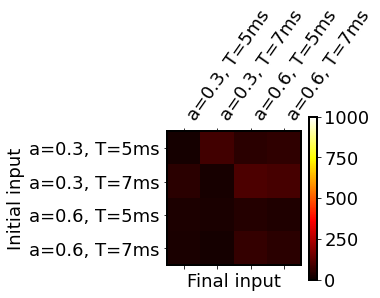

In [4]:
file_regex = './sims_out/2MC_reduced_*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.25_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.005_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    y_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
)

[[28.06987181 38.15472684 55.57851872 28.85970104 32.87821286]]
[[31.7215913  39.76342746 61.84373375 29.36650624 29.09106888]]
[[139.40456239 144.9000335  201.83957516 106.63366923 217.84122814]]
[[144.66133297 153.38154997 215.28197202 110.06589697 223.59021192]]
[[37.96203847 55.940622   81.16220939 40.51819179 40.21632893]]
[[26.23204694 38.78908025 74.10014451 29.46410607 26.34770119]]
[[198.56027582 181.55373319 252.44188022 137.19267067 177.69847385]]
[[209.1345389  190.49176314 267.65736992 141.37464321 185.84295294]]
[[15.40746891 32.4583832  29.98753832 33.68706795 27.20338361]]
[[15.53484848 37.69845815 34.81504869 44.05947814 29.41655469]]
[[51.58626913 59.19170184 68.92242777 44.08118414 43.11015844]]
[[39.33161192 42.01907111 48.10935789 33.82137715 26.61055795]]
[[14.70585802 24.94761897 25.45187103 19.34764197 21.15626773]]
[[13.98958034 23.52771536 25.15854163 19.30767244 21.35189171]]
[[71.33270838 75.24665819 89.52080786 57.90055996 62.8945369 ]]
[[50.89032442 51.845

array([[ 32.87821286,  31.7215913 , 144.9000335 , 153.38154997],
       [ 40.51819179,  29.46410607, 181.55373319, 190.49176314],
       [ 29.98753832,  34.81504869,  51.58626913,  39.33161192],
       [ 21.15626773,  21.35189171,  71.33270838,  50.89032442]])

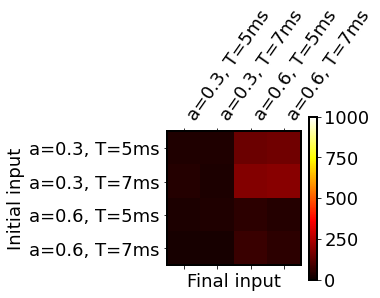

In [5]:
file_regex = './sims_out/2MC_reduced_*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.25_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.01_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    y_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
)

In [29]:
# file_regex = './sims_out/2MC_reduced_*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.25_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'
# plot_param_sweep(
#     file_regex,
#     (4, 4),
#     x_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
#     y_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
#     x_label='Final input',
#     y_label='Initial input',
# )

[[51.10732846 35.48638075 45.8953798  19.11839177 16.29056476]]
[[162.25698163 288.68709379 151.50385861  92.81231517  49.34413452]]
[[287.90741325 733.88682969 247.45982473 211.16859248  67.68525286]]
[[2251.00580574 9275.50578212 2451.37044119 2069.95242226  622.04742448]]
[[ 32.6915034   38.92625524 278.78798812  36.60760197  29.89908672]]
[[48.76780103 14.63754413 42.90688175 15.95128485 13.61790609]]
[[ 81.20819735  42.25016913 149.38562104  36.41433255  28.64839706]]
[[140.10437726 113.61854926 184.73690066  81.17781702 116.86329142]]
[[102.7909618  165.08753969 198.46700915 108.2185654  118.07628975]]
[[25.71613787 55.42972568 28.38280226 20.89782968 32.34857953]]
[[64.0513475  26.53446328 46.53776828 20.92924932 17.57511451]]
[[102.86318099  28.88871023 144.97459126  38.39041621  43.97182022]]
[[301.76808482 323.85662655 369.85745036 986.40826658 249.44367714]]
[[85.09834637 96.43811452 91.27481424 77.39831664 68.98871892]]
[[136.98893562 153.9265225  203.68275942 193.37965999 

array([[  35.48638075,  151.50385861,  247.45982473, 2251.00580574],
       [  36.60760197,   15.95128485,   42.25016913,  116.86329142],
       [ 118.07628975,   28.38280226,   26.53446328,   43.97182022],
       [ 323.85662655,   85.09834637,  153.9265225 ,   72.0571685 ]])

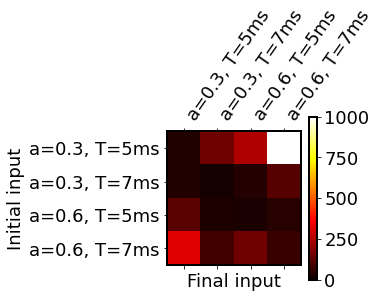

In [7]:
file_regex = './sims_out/2MC_reduced_*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.1_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.001_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    y_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
)

[[14.51819171 22.46752614 55.91205536 17.92421287 13.21587181]]
[[83.51818409 98.26436173 69.00143891 53.1604807  28.96761613]]
[[86.39982683 47.12708473 59.83152143 41.65453108 30.1382374 ]]
[[151.59530768 392.75104521 308.76855528 176.92073108  58.07221897]]
[[29.98115122 44.6700063  90.48878155 34.56964887 28.69098096]]
[[13.01699479 20.98357045 45.13626227 17.91556506 12.14681365]]
[[ 96.71609882  65.97530719 109.80676911  60.03617543  45.2461731 ]]
[[ 65.52541299  28.97377191 107.78123757  28.12356363  16.67222936]]
[[34.08387158 76.14583024 52.11210076 46.83644799 52.64804499]]
[[20.21765232 33.18729345 40.3746878  17.44144462 22.9833866 ]]
[[31.11668718 41.25003487 77.65630113 36.14667535 33.8244126 ]]
[[63.93790353 28.59622413 69.08124208 21.69940933 18.63897578]]
[[ 42.58185016 108.93305511  65.76390004  51.55630737  66.3902685 ]]
[[22.31041858 43.06105028 83.23578222 27.21298726 34.64583915]]
[[247.50549702 143.48168958 175.74005974  85.24768263 111.36192725]]
[[165.21639011 

array([[ 17.92421287,  69.00143891,  47.12708473, 176.92073108],
       [ 34.56964887,  17.91556506,  65.97530719,  28.97377191],
       [ 52.11210076,  22.9833866 ,  36.14667535,  28.59622413],
       [ 65.76390004,  34.64583915, 143.48168958,  83.6778075 ]])

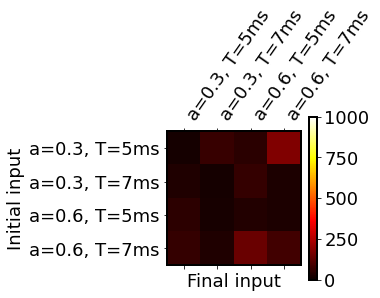

In [8]:
file_regex = './sims_out/2MC_reduced_*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.1_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.005_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    y_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
)

[[14.98419593 25.69949098 56.8359623  19.27705657 12.75684743]]
[[21.79702799 27.83825034 50.65003497 20.79093617 13.27234899]]
[[ 63.32153281  77.8265529  123.44020684  64.28166391  81.81762981]]
[[ 90.3528201   57.3718968  153.28834413  51.22504111  37.59097401]]
[[26.25477197 42.4585489  86.32705586 30.87709145 26.36255515]]
[[16.2364597  26.63135006 67.7496281  22.13595535 15.19331117]]
[[ 90.91915938 105.97563044 168.59179433  88.4751281   88.33591829]]
[[ 62.77311701  82.85240228 143.75574211  70.72797171  60.39583387]]
[[28.03055768 68.43851199 52.34316053 43.6166603  42.26219225]]
[[21.17630037 46.38373689 45.36481827 27.82693904 28.03674687]]
[[42.74448479 71.97124913 61.15804681 40.05935395 39.48697827]]
[[72.34312034 38.38983038 50.2028282  28.41374367 25.95891485]]
[[24.15953642 62.32274914 36.67425954 33.5282226  42.71439205]]
[[17.30126217 47.6071708  39.77264773 21.07011827 29.66792171]]
[[ 75.17667976 111.24810614 114.5871795   71.1382653   79.91678455]]
[[51.25153103 8

array([[19.27705657, 21.79702799, 77.8265529 , 57.3718968 ],
       [30.87709145, 22.13595535, 90.91915938, 70.72797171],
       [43.6166603 , 28.03674687, 42.74448479, 38.38983038],
       [36.67425954, 29.66792171, 79.91678455, 53.40107079]])

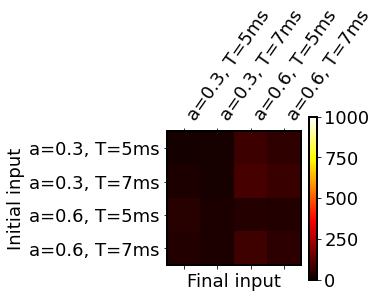

In [9]:
file_regex = './sims_out/2MC_reduced_*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.1_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.01_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    y_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
)

[[23.88072621 32.63746787 74.24394634 30.20497139 19.47495171]]
[[278.40279474 204.20954922 106.76253245  29.46520426  26.14929121]]
[[951.34733137 618.95324529 314.63187777 114.70669802 187.55347632]]
[[6481.39691394 2373.35736379 2385.51339458  659.06316811 1153.66936783]]
[[16.70539864 29.85489909 61.36209921 21.32072968 17.25792177]]
[[16.94000032 26.73191895 70.42831913 20.0486125  16.52049301]]
[[218.32100234 206.87007409 297.89882298 144.88630888 187.25940495]]
[[215.9469367  205.1126085  301.34401315 146.31697328 186.92581646]]
[[ 59.14688757  79.93801423  82.43571813  80.82195483 141.9807938 ]]
[[ 52.62365153  66.18961195  78.26047397  67.75878931 109.4105839 ]]
[[39.27084441 64.67611134 49.02365886 30.28639841 27.34941513]]
[[30.73059032 52.17644458 40.52658805 21.98927445 19.07591654]]
[[ 40.47726259  52.8486579   66.82512437  33.37293581 177.52208797]]
[[ 37.41939047  45.81290339  68.16681217  31.82781926 132.26730686]]
[[47.19132265 58.6905804  54.72743718 36.7235618  31.0

array([[  30.20497139,  106.76253245,  314.63187777, 2373.35736379],
       [  21.32072968,   20.0486125 ,  206.87007409,  205.1126085 ],
       [  80.82195483,   67.75878931,   39.27084441,   30.73059032],
       [  52.8486579 ,   45.81290339,   47.19132265,   30.57139138]])

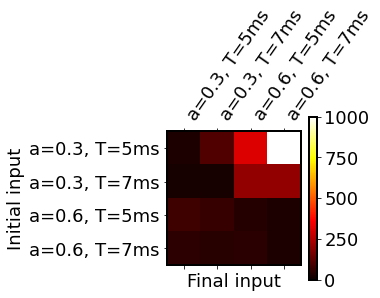

In [10]:
file_regex = './sims_out/2MC_reduced_*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.1_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    y_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
)

## Second moment on excitatory synapses

[[62.10937884 36.35177462 36.12686944 20.20860359 17.81423818]]
[[165.2557983  353.50040484 153.79044659  97.26841266  56.06068067]]
[[ 530.94006594 2122.30803029  590.1431553   441.78596268  163.85420191]]
[[ 4610.08050553 25282.54839019  5696.53178739  4593.35917706
   1530.62362607]]
[[51.32798326 54.75975782 63.04644033 39.16373783 30.25604882]]
[[57.28654977 16.53729781 25.13018748 16.91281478 18.51388666]]
[[128.2055278   48.49814038 151.35084402  71.61538893  40.09953263]]
[[503.22796346 227.42022778 471.55577123 248.46136457 320.11700362]]
[[273.35046667 313.1861949  274.71902616 230.08049087 196.37584155]]
[[ 36.09976158 116.23556557  35.2672555   46.99515769  51.40894682]]
[[66.79608638 33.84707576 66.96174347 19.31242489 17.42469828]]
[[217.19785759 136.98052277 315.35609116 186.68450348 142.03313187]]
[[1028.4307295   775.1696519   995.84773279  685.77054598  565.69692363]]
[[180.47756922 174.53275651 156.9699907  136.02664456 144.55969149]]
[[143.45302461 159.21234241 156.

array([[  36.12686944,  153.79044659,  530.94006594, 4610.08050553],
       [  51.32798326,   18.51388666,   71.61538893,  320.11700362],
       [ 273.35046667,   46.99515769,   33.84707576,  186.68450348],
       [ 775.1696519 ,  156.9699907 ,  143.45302461,   42.86204825]])

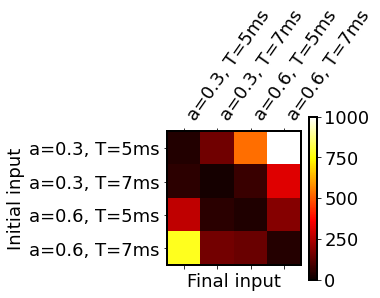

In [4]:
file_regex = './sims_out/2MC_reduced*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.1_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    y_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
)

[[ 50.77333954 148.79522652  36.79160515  18.62656535  17.48281407]]
[[   581.3755995  143207.62377402    699.66771191    650.86206131
     277.2556123 ]]
[[  1034.11397782 256926.86567938   1344.64178131   1240.21721418
     510.02326194]]
[[   7503.87109371 1994157.56701584   11429.68560573    9173.4866683
     4156.70738053]]
[[71.34871108 94.04321873 92.38216072 48.19911478 36.80647512]]
[[34.10407452 34.10083565 24.23795434 14.37081578 15.24811087]]
[[87.05279253 43.37633731 54.04364295 24.70439212 26.34262812]]
[[569.21349565  95.69188933 365.4169646  156.53194954 289.74482301]]
[[86.39108458 84.36420711 95.88042029 45.44299043 50.88391368]]
[[76.8976654  62.62322285 31.91384215 17.23909488 22.75741972]]
[[64.86360758 40.07317827 96.00480789 17.23493716 15.46310797]]
[[281.41007313  97.65466047 192.60823105 125.64289913 138.10677211]]
[[167.12152618 171.22729675 269.74657852 122.90993391 118.46611117]]
[[239.96813692  89.80081222 163.08280487 146.02359925  70.78696349]]
[[182.588

array([[  36.79160515,  650.86206131, 1240.21721418, 9173.4866683 ],
       [  71.34871108,   24.23795434,   43.37633731,  289.74482301],
       [  84.36420711,   31.91384215,   40.07317827,  138.10677211],
       [ 167.12152618,  146.02359925,  116.88441423,   54.29417515]])

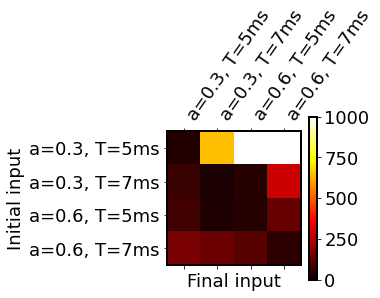

In [5]:
file_regex = './sims_out/2MC_reduced*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.25_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    y_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
)

[[45.12143725 37.2936375  40.63733571 15.5325148  14.16832838]]
[[ 314.12214652 1177.42244868  381.12604404  355.93133515  152.02351035]]
[[ 415.63421469 1271.57109629  554.83546578  470.26616133  181.06642509]]
[[ 2991.66934019 11880.77215374  4441.2921666   3736.94757319
   1514.02817208]]
[[ 86.90270849 102.27028822  97.49002338  52.35399184  40.52156607]]
[[35.79530579 31.6677092  24.93489345 15.24541294 13.60254935]]
[[ 93.63735212  44.38738231 105.60492976  30.10999502  26.21079088]]
[[552.41713042 114.31258794 301.57670342 160.2419663  239.4622039 ]]
[[148.64507242  38.34808394  89.34783761  56.13847895  43.57532387]]
[[136.63881461  29.11482095  95.01259475  47.92593328  52.51154746]]
[[66.48375348 21.8533071  56.14144306 18.76037135 13.74783089]]
[[301.06566022 117.86663248 276.49717736 113.3652926  147.12716709]]
[[356.53379332 147.60456522 215.12320779 261.62401868 167.413436  ]]
[[397.73106473 101.84639417 182.78269335 291.32227772 176.65872592]]
[[189.47787086  86.80976077

array([[  37.2936375 ,  355.93133515,  470.26616133, 3736.94757319],
       [  86.90270849,   24.93489345,   44.38738231,  239.4622039 ],
       [  56.13847895,   52.51154746,   21.8533071 ,  147.12716709],
       [ 215.12320779,  182.78269335,  139.95447139,   45.97993632]])

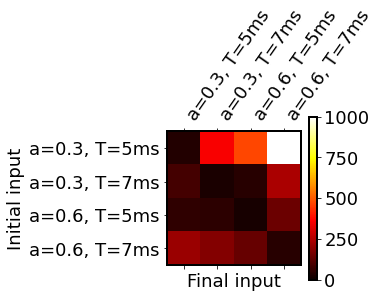

In [7]:
file_regex = './sims_out/2MC_reduced*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.5_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    y_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
)

[[43.72470341 21.25878241 41.75525187 16.41826418 15.13146821]]
[[ 314.49524321 1414.74412137  450.90574733  388.1783993   147.51993395]]
[[ 445.60595928 1729.2280235   736.33254172  555.04031098  183.85619717]]
[[ 3251.35929415 16036.83465856  6119.77144378  4435.81153289
   1562.48851455]]
[[ 89.27042184  73.94745325 102.21179414  51.61199517  48.34068722]]
[[34.86832726 16.77901614 26.38436319 16.11373235 14.27598322]]
[[ 93.88880482  31.52680292 104.50187722  30.08442155  24.63570113]]
[[577.04987636 126.34649284 318.54649567 158.49216052 245.19924763]]
[[135.62911425  36.53747087  89.22261441  52.30717206  42.5492353 ]]
[[121.94232121  31.05182383  78.26647231  40.27757135  46.14288632]]
[[66.45228805 21.31925697 60.08959966 18.94800602 13.96353171]]
[[303.98749636 113.75466594 266.94423057 114.36066137 144.99759991]]
[[339.10983313 150.92887648 211.96109358 238.08957475 148.01757111]]
[[378.59389107 131.85007964 166.17823356 259.04649546 145.3360826 ]]
[[186.04789703 111.35124163

array([[  21.25878241,  388.1783993 ,  555.04031098, 4435.81153289],
       [  73.94745325,   16.77901614,   31.52680292,  245.19924763],
       [  52.30717206,   46.14288632,   21.31925697,  144.99759991],
       [ 211.96109358,  166.17823356,  132.13059798,   59.87628325]])

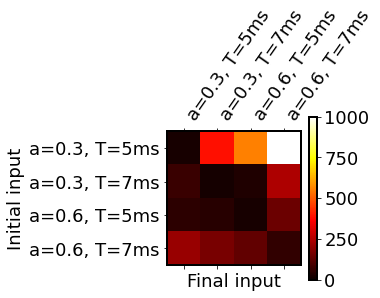

In [8]:
file_regex = './sims_out/2MC_reduced*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_1.0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    y_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
)

## First moment on excitatory synapses

[[36.02237077 19.47356973 39.84234529 23.27607487 28.29479094]]
[[79.15390679 79.29697462 72.56864373 67.09833079 63.49320933]]
[[107.07711404  64.70561089  78.60163599  56.49035332  58.38526959]]
[[304.07942838 319.9287433  468.42305593 343.83352003 233.69039596]]
[[57.20921586 46.9939635  46.27534508 54.86882989 49.60854973]]
[[75.59200861 38.41692715 38.3213068  27.68427989 31.34586645]]
[[101.13200949  72.5188494  108.35925414  61.70358916  56.76282778]]
[[186.07841667 140.00885056 315.41306688 161.95086389 140.1545523 ]]
[[482.41303047 389.49588542 314.24541076 232.63965088 237.77210122]]
[[ 246.63150623  146.69795857  871.75308136  678.03401313 2143.22952688]]
[[229.02016655 156.25601894 449.25919917 261.91987689 674.87005975]]
[[  470.5979065    373.64168075  7022.9352432   5776.34217759
  15123.95616851]]
[[632.01140955 721.82516887 783.29166368 780.34256333 699.12232312]]
[[120.66548882  77.95389139 128.27902025 128.98672687  85.69701796]]
[[181.92491073 216.52699334 258.63506

array([[  28.29479094,   72.56864373,   64.70561089,  319.9287433 ],
       [  49.60854973,   38.3213068 ,   72.5188494 ,  161.95086389],
       [ 314.24541076,  678.03401313,  261.91987689, 5776.34217759],
       [ 721.82516887,  120.66548882,  201.09407723,  205.92787726]])

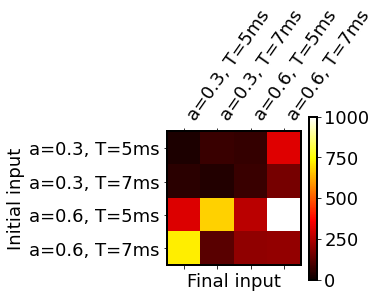

In [9]:
file_regex = './sims_out/2MC_reduced*SEED_2_*_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0.01_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_1_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    y_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
)

[[179.1165832   83.69331927 117.24358324  52.50240973  74.15820476]]
[[387.42748474 319.41078205 446.23865732 346.0704848  261.33987918]]
[[885.20081714 376.46700095 961.86777705 775.8984424  469.56703387]]
[[3856.84761933  937.24531568 5016.62759477 3409.64891343 1397.41964882]]
[[403.68024213 279.44986347 486.20965007 308.08377703 384.78906794]]
[[121.50508172  79.65396976 172.08082718  66.55337557  97.54325728]]
[[173.85058063 179.21818976 301.81633475 252.45530417 255.3479862 ]]
[[ 613.49678516  840.06808549 1115.20341054 1466.59990991  962.82614146]]
[[ 650.05499027 1615.44095137 1914.84629466  895.80418114  814.25165718]]
[[346.5614391  365.91145    776.26919798 249.15658927 325.87307744]]
[[237.91825494 169.12689508 362.11223915 115.21546003 203.10036137]]
[[405.51777593 128.55413099 325.52220963 224.11438546 356.87100557]]
[[1123.46958189 1133.78122454 1574.01749766 1121.48993118 1307.46902464]]
[[743.37515196 687.88226858 920.05635038 772.44851413 657.85867951]]
[[513.15503813

array([[  83.69331927,  346.0704848 ,  775.8984424 , 3409.64891343],
       [ 384.78906794,   97.54325728,  252.45530417,  962.82614146],
       [ 895.80418114,  346.5614391 ,  203.10036137,  325.52220963],
       [1133.78122454,  743.37515196,  526.94018441,  280.94442362]])

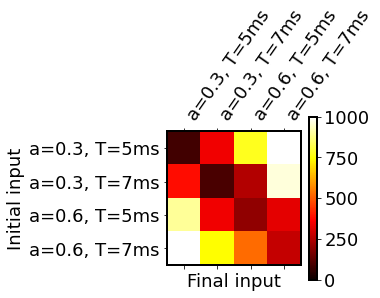

In [10]:
file_regex = './sims_out/2MC_reduced*SEED_2_*_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0.1_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_1_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    y_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
)

[[176.85312069  74.857497   152.44471166  67.68200255  78.24054669]]
[[400.15620092 182.2225032  406.19121901 278.94924809 256.71976921]]
[[898.51574439 176.57375813 756.3788171  770.66440365 622.7890763 ]]
[[4107.31364261  680.02194944 3338.99953017 3461.79754475 2945.17298358]]
[[586.11820898 166.81650199 268.7417239  379.36825239 155.84016404]]
[[138.31024642  51.68788041 127.08690448  83.26107892  33.14418351]]
[[613.04833942  84.22970072 244.62974309 286.51546718 120.36407802]]
[[1730.12050754  515.11996169 1012.96360245 1306.15810016  852.96949795]]
[[ 944.18514883  526.98177033 1296.97101646  485.04050797  389.84440437]]
[[250.16711137 266.01696271 418.74733199 214.64692889 168.12256127]]
[[ 82.35789986  79.98443486 143.62883913 102.21038652  51.34683931]]
[[305.27393195 170.5815289  353.63571824 353.8406242  251.99838339]]
[[1239.92941135 1202.41219415 1167.82252475 1285.64008179  741.93875911]]
[[801.40400318 836.0314631  709.58794965 768.73128966 471.26004284]]
[[295.2855867 

array([[  78.24054669,  278.94924809,  756.3788171 , 3338.99953017],
       [ 268.7417239 ,   83.26107892,  244.62974309, 1012.96360245],
       [ 526.98177033,  250.16711137,   82.35789986,  305.27393195],
       [1202.41219415,  768.73128966,  295.2855867 ,   96.31117092]])

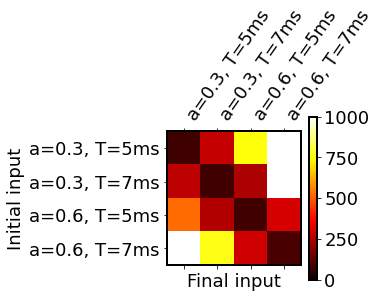

In [11]:
file_regex = './sims_out/2MC_reduced*SEED_2_*_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0.25_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_1_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    y_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
)

[[177.84926394  67.36843255 173.24081193 114.73833665  53.78941234]]
[[397.02279943 113.41656549 419.82376542 472.47885341 258.04044398]]
[[ 901.14919906   61.28477133  774.40205314 1140.41584426  470.03458794]]
[[4283.82235663  167.79147293 3401.34501871 5048.18330498 2200.14559007]]
[[291.39525322 122.0985709  288.12902199 181.02749547 119.18738517]]
[[ 89.31047933 100.52285672 148.45770384  78.29889454  46.29787907]]
[[217.76066919 105.2678649  240.92133105 271.68522653 155.24891439]]
[[1193.34060358  480.36452266  972.15277975 1111.13796732 1041.17819401]]
[[478.49646486  77.16450849 357.11705643 192.27327499 155.6523722 ]]
[[274.39667596 152.68569673 318.73998334 135.28305478 190.40879887]]
[[119.67577241  61.25395257 173.01286632 120.03561157  64.48297722]]
[[349.90592071 151.63233029 384.39984163 349.8211455  254.86109772]]
[[732.58876313 362.89381111 627.72405475 638.92871185 335.79784044]]
[[660.78896297 397.61036512 611.02517367 592.80810267 389.23586714]]
[[258.92940607 169.

array([[ 114.73833665,  397.02279943,  774.40205314, 3401.34501871],
       [ 181.02749547,   89.31047933,  217.76066919, 1041.17819401],
       [ 192.27327499,  190.40879887,  119.67577241,  349.8211455 ],
       [ 627.72405475,  592.80810267,  258.92940607,   86.96415147]])

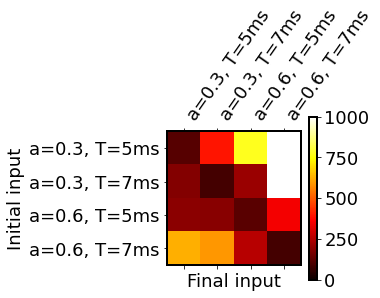

In [12]:
file_regex = './sims_out/2MC_reduced*SEED_2_*_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_1.0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_1_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    y_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
)

In [3]:
def find_batch_num(name):
    idx = name.find('batch')
    trimmed_name = name[idx + 6:]
    idx_underscore = trimmed_name.find('_')
    trimmed_name = trimmed_name[:idx_underscore]
    return int(trimmed_name)

def find_trial_num(name):
    idx = name.find('trial')
    trimmed_name = name[idx + 6:]
    idx_underscore = trimmed_name.find('.')
    trimmed_name = trimmed_name[:idx_underscore]
    return int(trimmed_name)

def plot_activities(dir_name, idx_dir, ic_labels, fc_labels, batch_idx=0):
    scale = 1
    fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 7 * scale), sharex=True, sharey=True)
    
    file_regex = os.path.join(dir_name, f'all_r_0_batch_{batch_idx}_trial_*')
#     print(dir_name)
#     print(idx_dir % len(ic_labels))
#     print(ic_labels[int(idx_dir / len(ic_labels))], r'$\rightarrow$', fc_labels[idx_dir % len(ic_labels)])

    initial_activations = []
    final_activations = []

    for file_path in glob.glob(file_regex):

        batch_num = find_batch_num(file_path)
        trial_num = find_trial_num(file_path)

        r = read_csv(file_path, read_header=False)

        if trial_num < 10:
            initial_activations.append(r)
        else:
            final_activations.append(r)

    mean_initial = np.array(initial_activations)
    mean_initial = mean_initial.mean(axis=0)

    mean_final = np.array(final_activations)
    mean_final = mean_final.mean(axis=0)

    if len(mean_initial.shape) > 1:
        n_lines = mean_initial.shape[1]
        cmap = matplotlib.colormaps['plasma']
        colors = cmap(np.linspace(0, 1, n_lines))

        for n_idx in reversed(np.arange(20)):
            axs.plot(np.arange(mean_initial.shape[0]) * 0.1, 0.2 * n_idx + mean_initial[:, n_idx], '--', c=colors[n_idx])
            axs.plot(np.arange(mean_final.shape[0]) * 0.1, 0.2 * n_idx + mean_final[:, n_idx], c=colors[n_idx])
        axs.set_xlabel('Time (ms)')
        axs.set_ylabel('Firing rate')
        axs.set_yticks([])
        axs.set_title(ic_labels[int(idx_dir / len(ic_labels))] + r'$\rightarrow$' + fc_labels[idx_dir % len(ic_labels)])

#         axs.set_xlim(0, 1000)



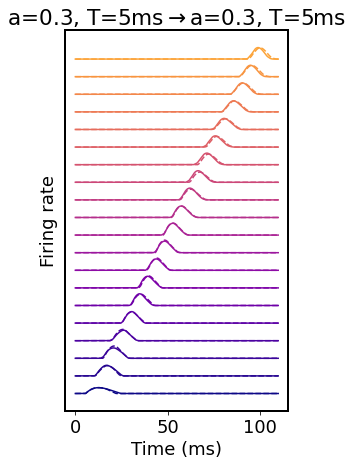

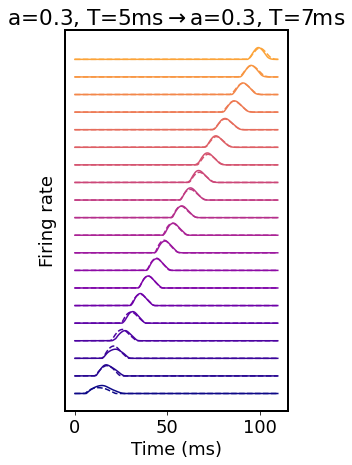

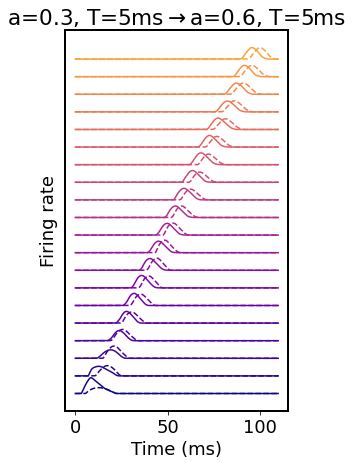

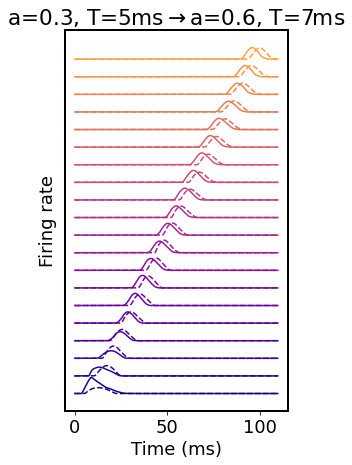

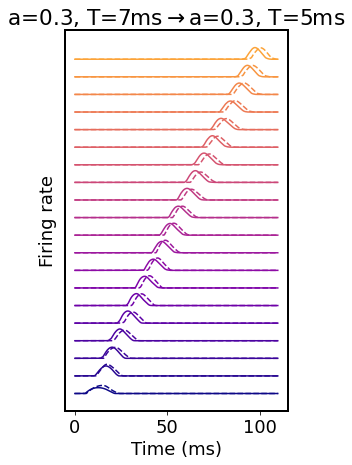

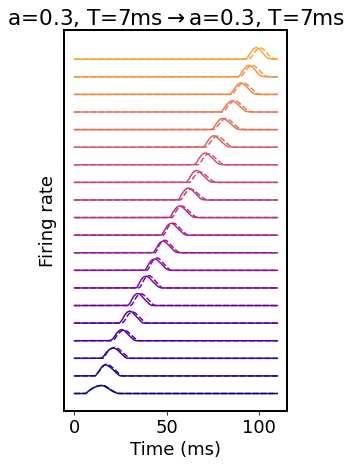

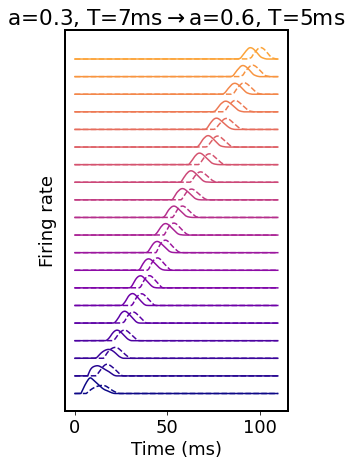

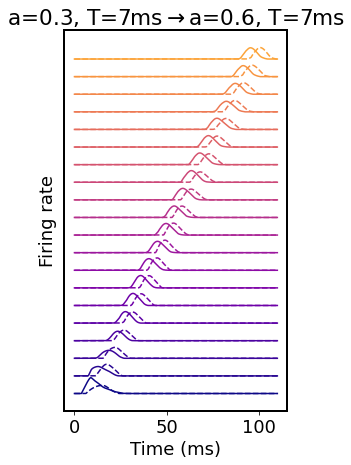

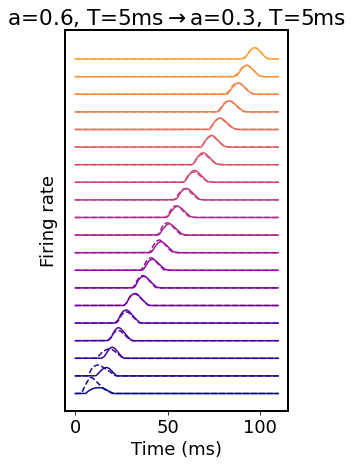

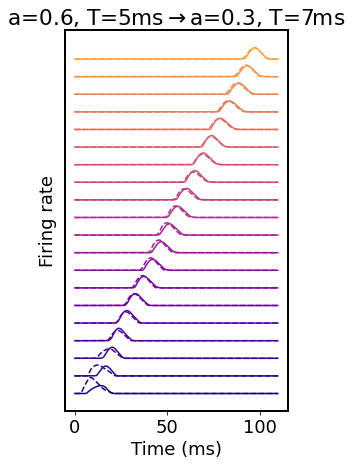

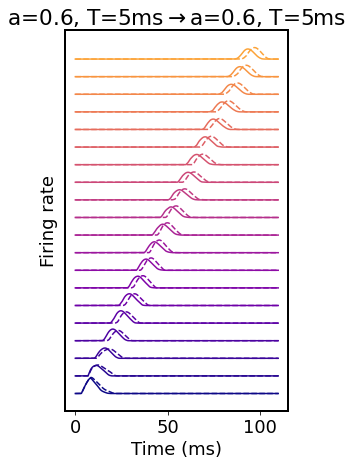

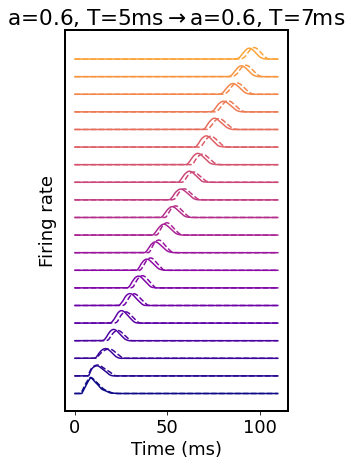

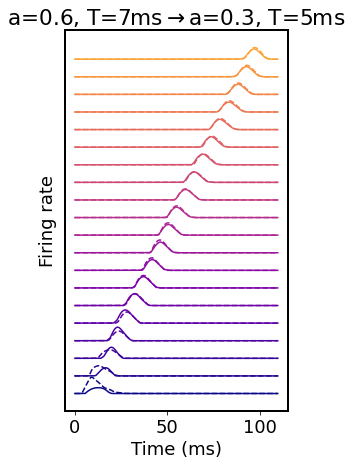

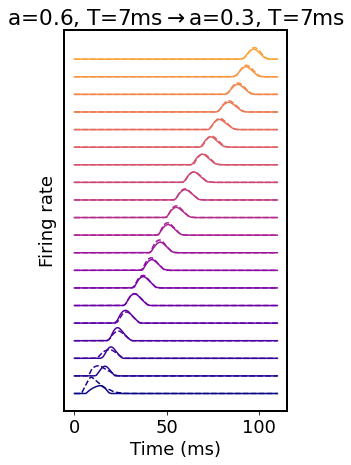

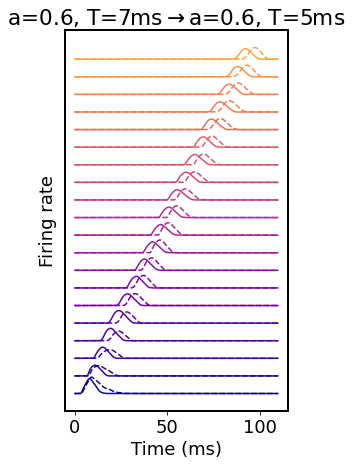

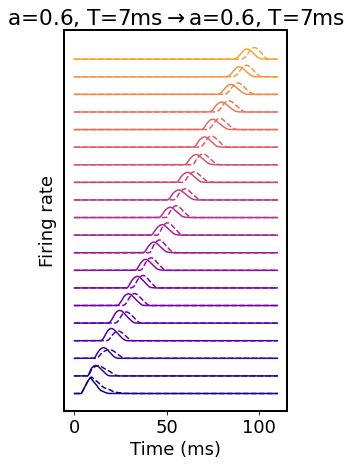

In [21]:
ic_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms']
fc_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms']

file_regex = './sims_out/2MC_reduced*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.1_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.01_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'
for idx_dir, dir_name in enumerate(sorted(glob.glob(file_regex))):
    plot_activities(dir_name, idx_dir, ic_tick_labels, fc_tick_labels, batch_idx=1)

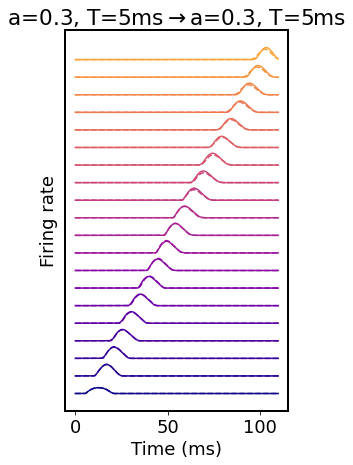

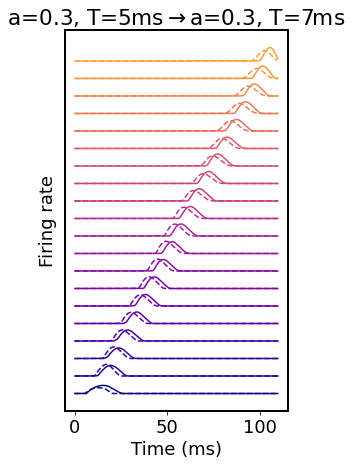

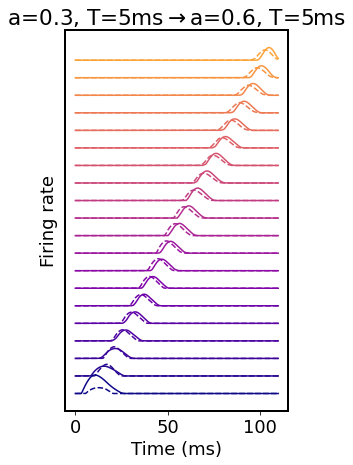

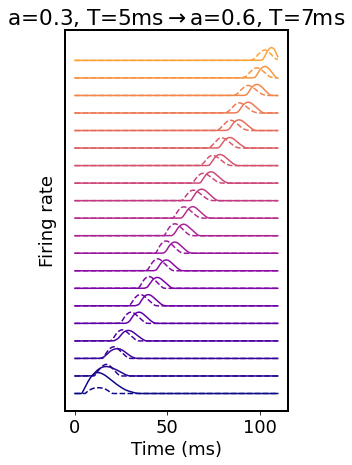

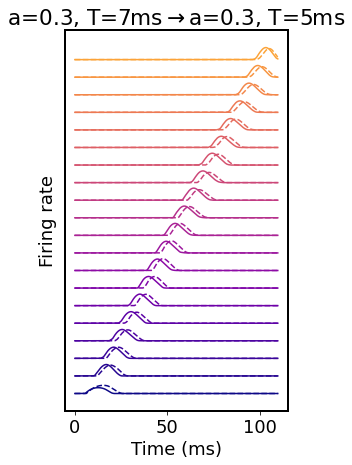

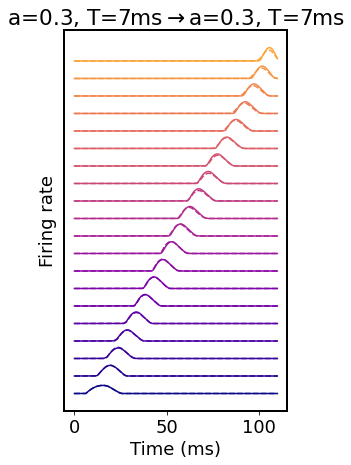

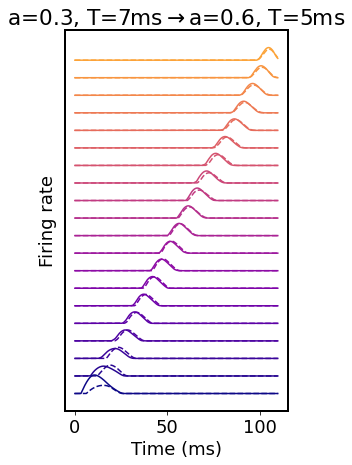

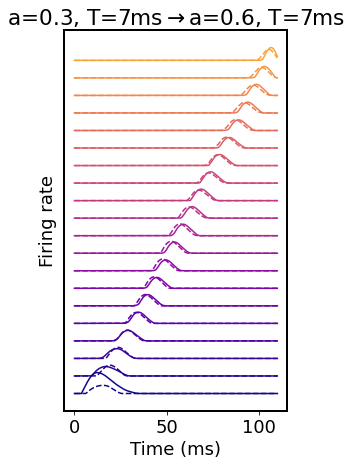

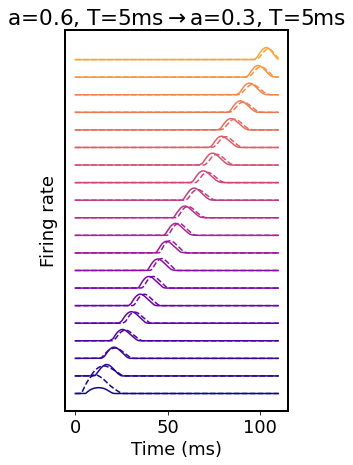

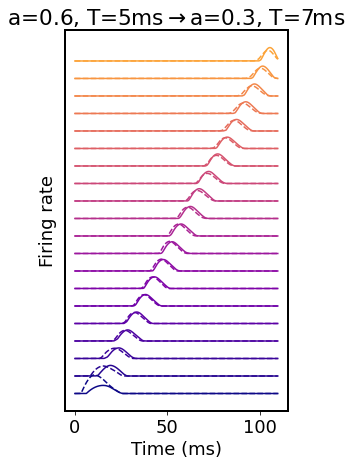

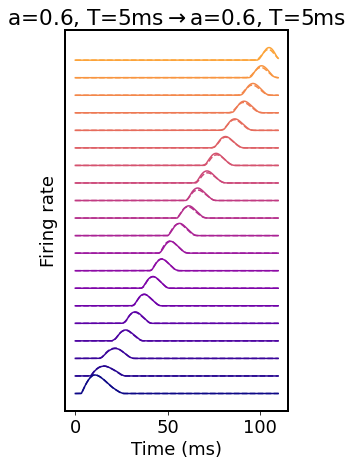

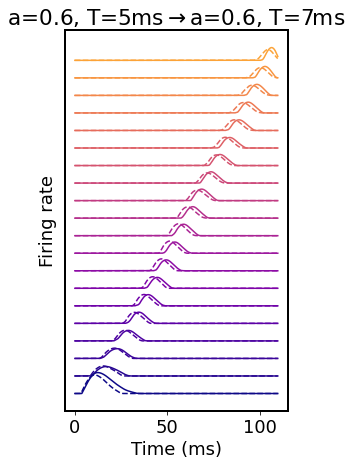

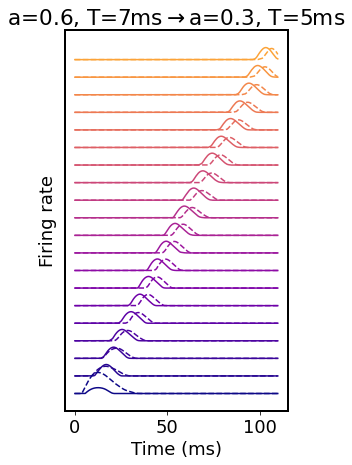

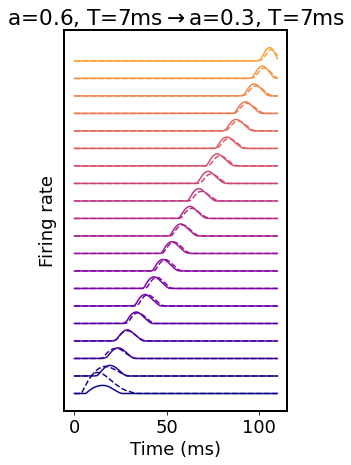

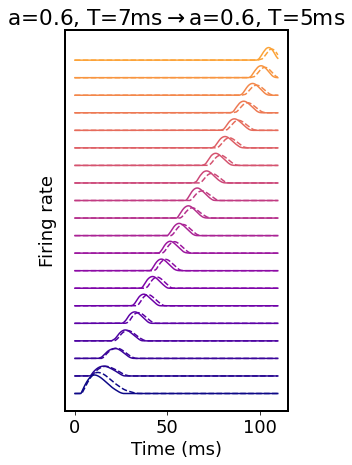

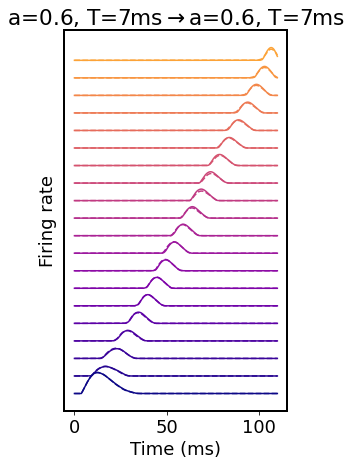

In [22]:
ic_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms']
fc_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms']

file_regex = './sims_out/2MC_reduced*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_1.0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'
for idx_dir, dir_name in enumerate(sorted(glob.glob(file_regex))):
    plot_activities(dir_name, idx_dir, ic_tick_labels, fc_tick_labels, batch_idx=1)

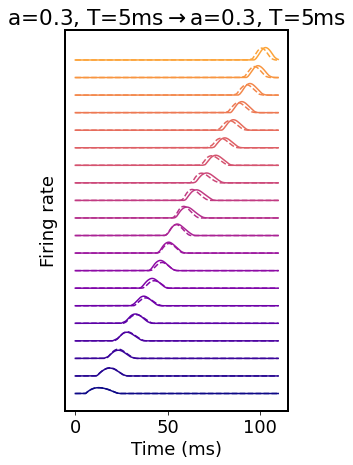

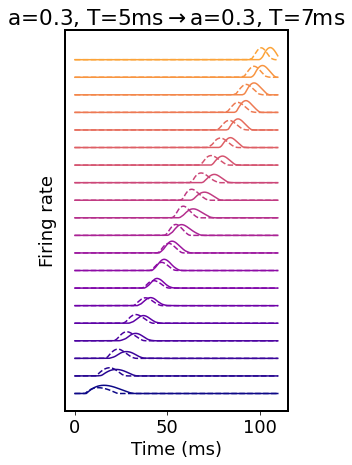

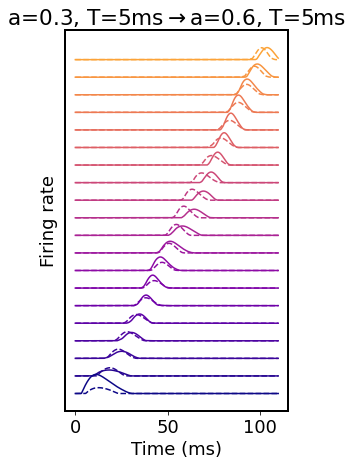

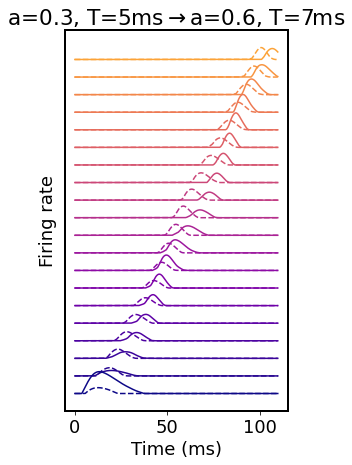

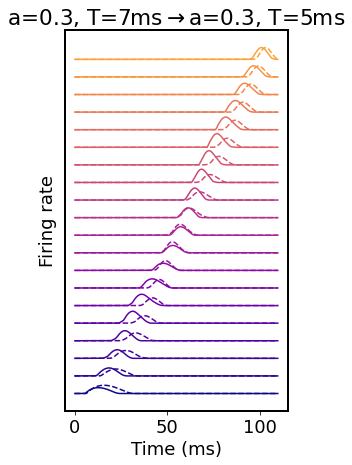

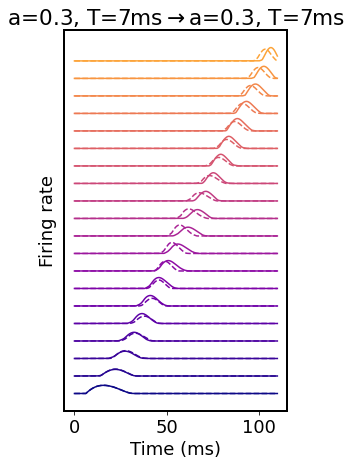

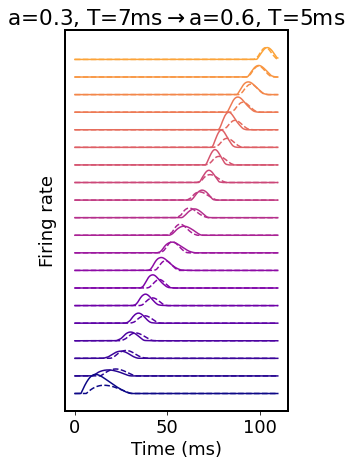

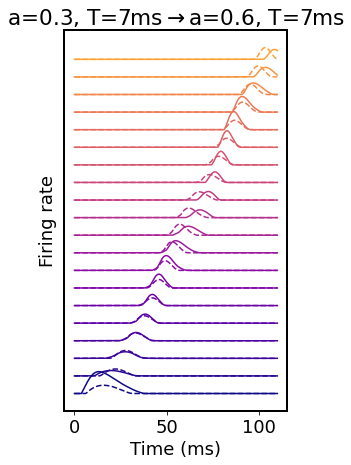

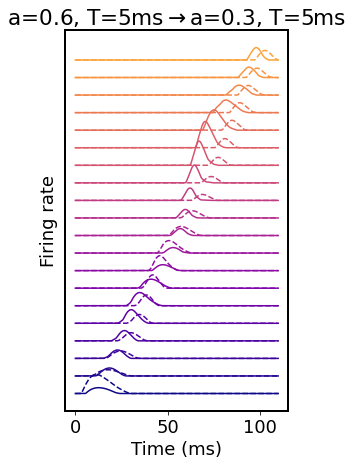

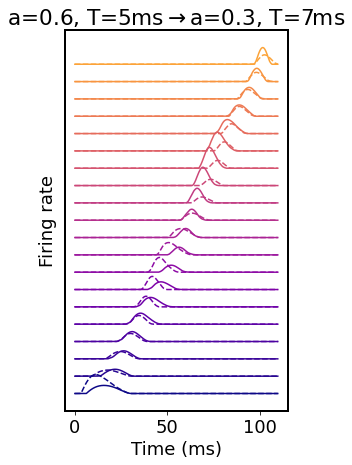

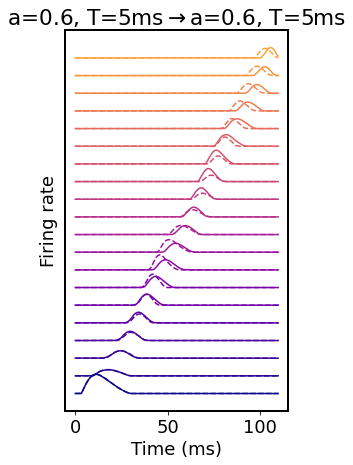

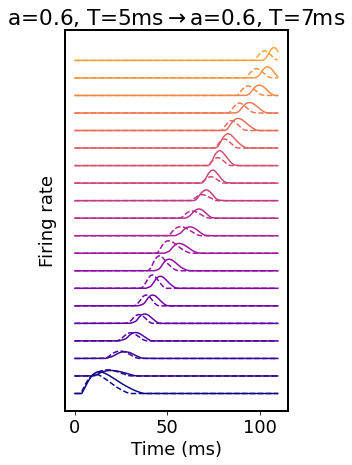

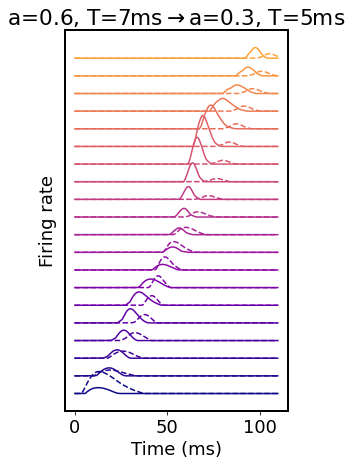

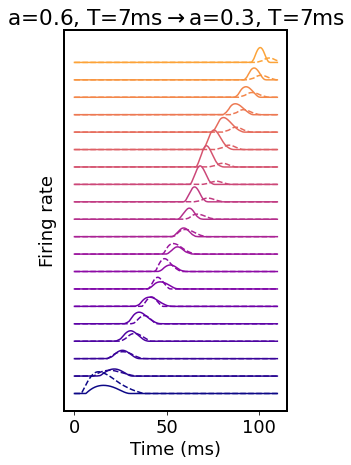

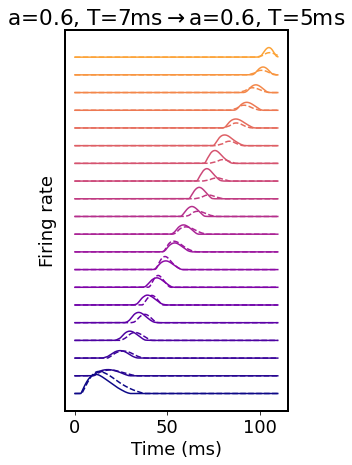

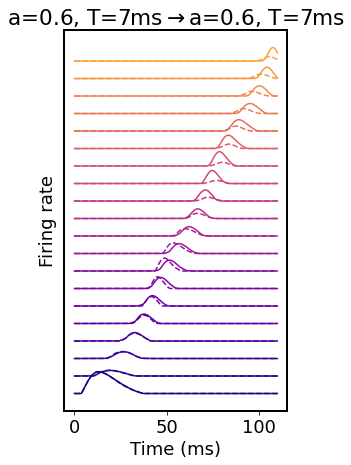

In [32]:
ic_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms']
fc_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms']

file_regex = './sims_out/2MC_reduced*SEED_2_*_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0.25_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_1_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_*'
for idx_dir, dir_name in enumerate(sorted(glob.glob(file_regex))):
    plot_activities(dir_name, idx_dir, ic_tick_labels, fc_tick_labels, batch_idx=1)

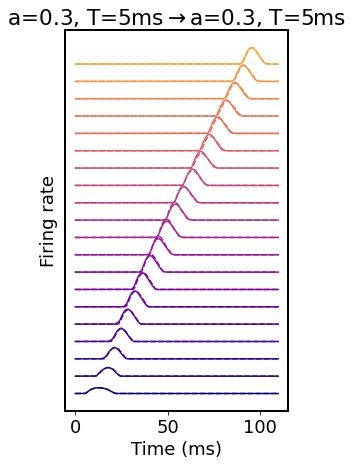

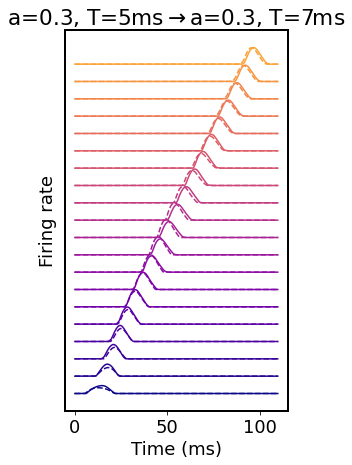

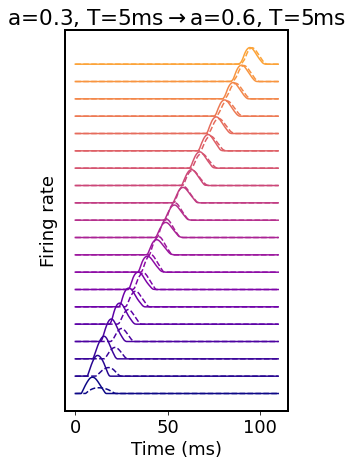

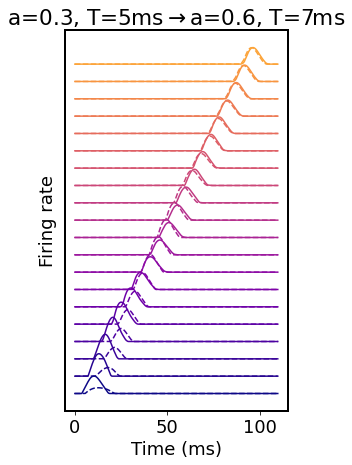

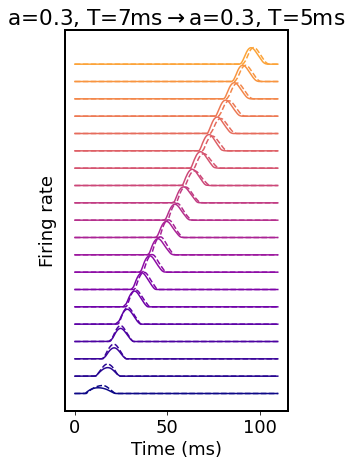

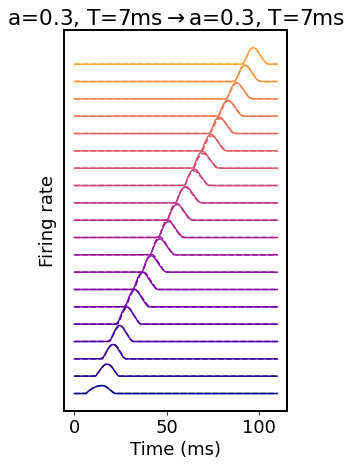

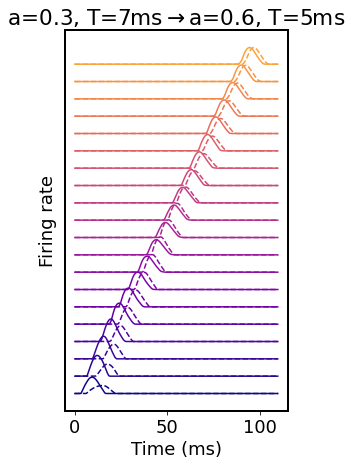

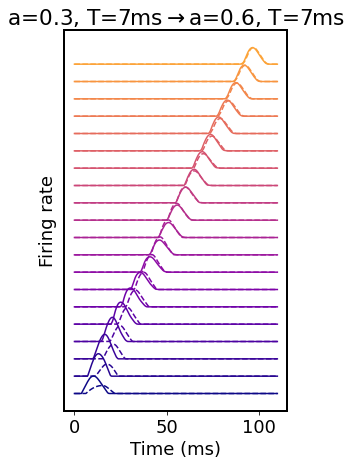

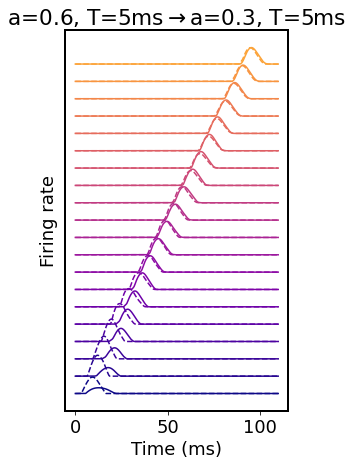

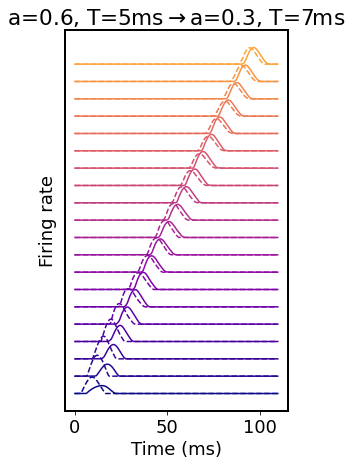

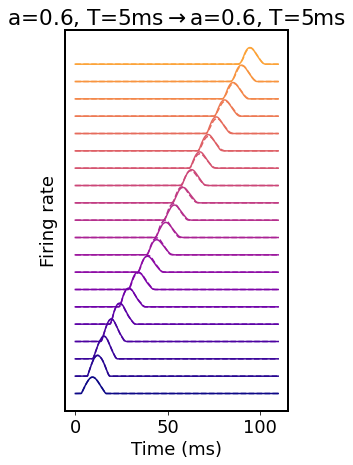

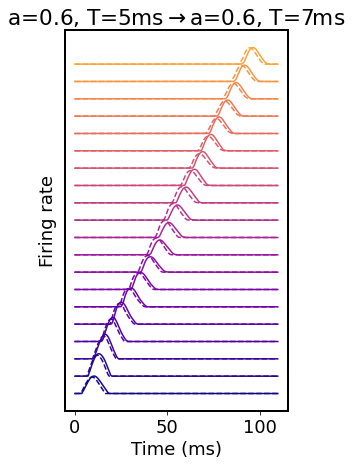

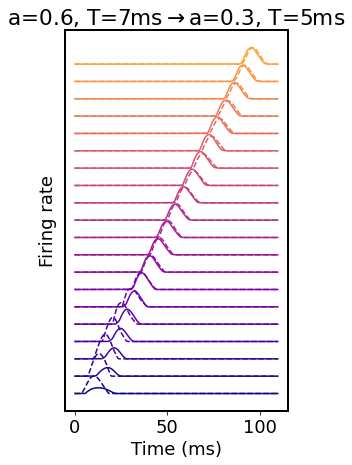

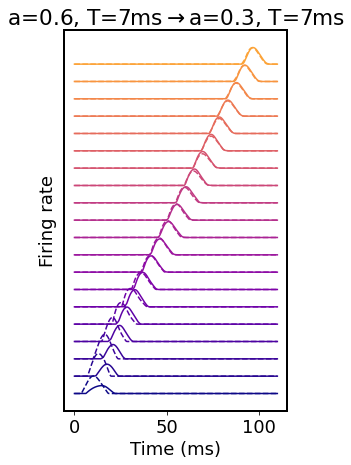

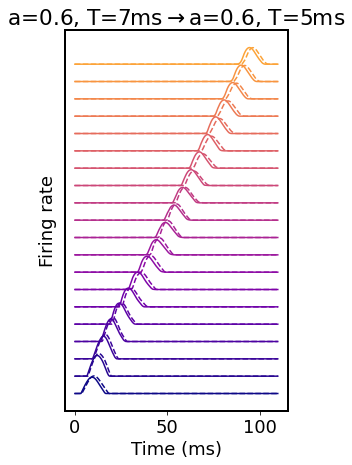

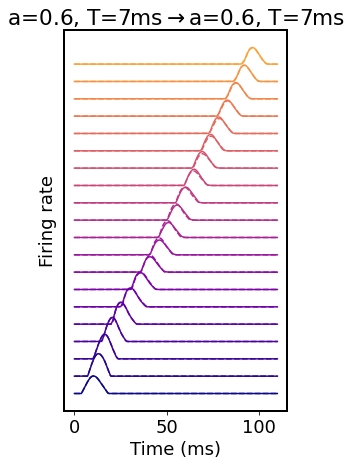

In [27]:
ic_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms']
fc_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms']

file_regex = './sims_out/2MC_reduced_*SEED_2_*_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_*'
for idx_dir, dir_name in enumerate(sorted(glob.glob(file_regex))):
    plot_activities(dir_name, idx_dir, ic_tick_labels, fc_tick_labels, batch_idx=1)

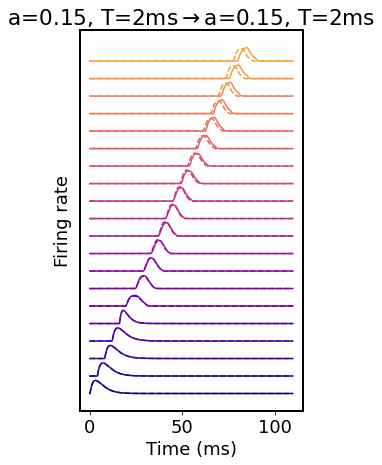

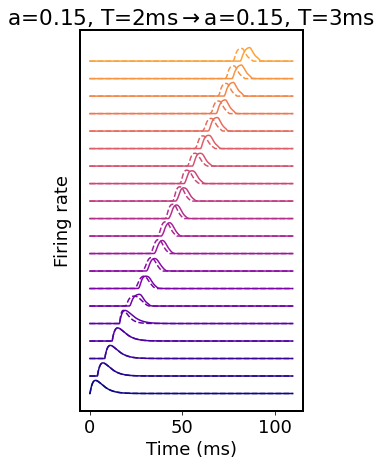

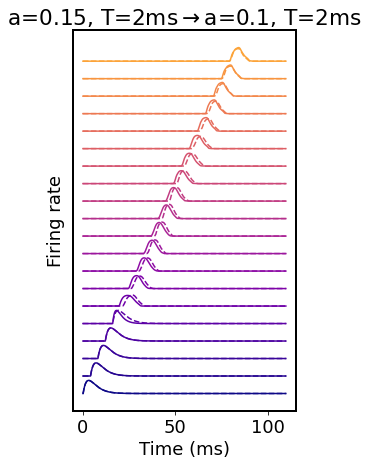

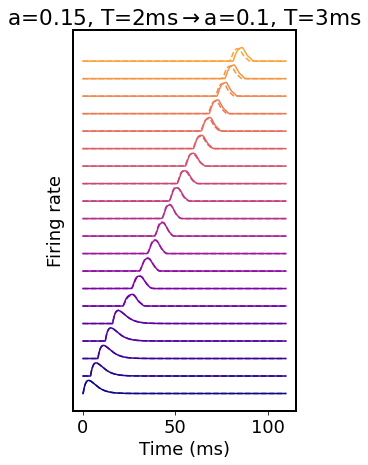

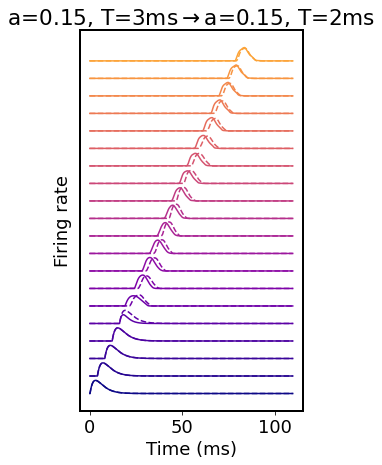

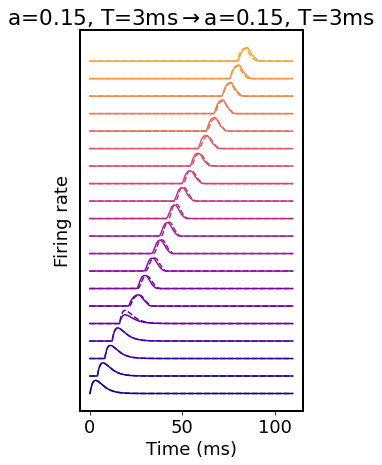

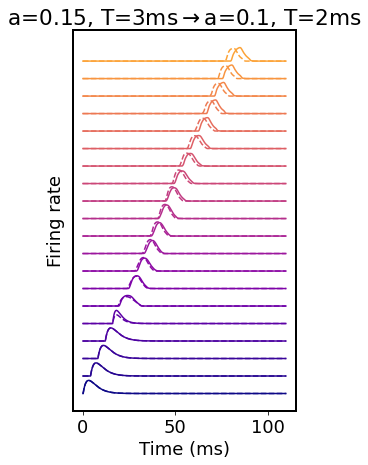

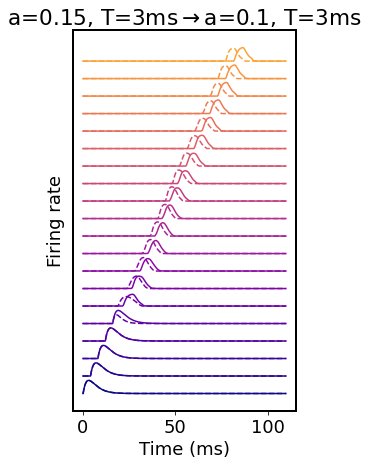

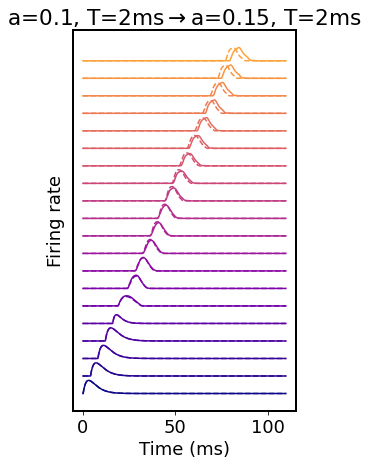

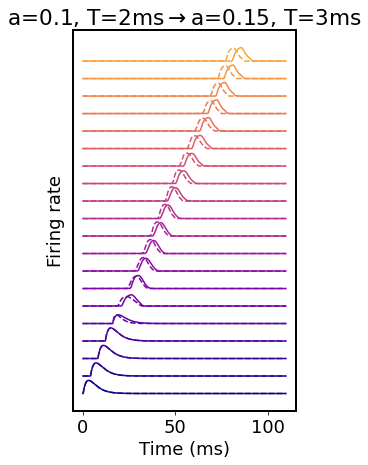

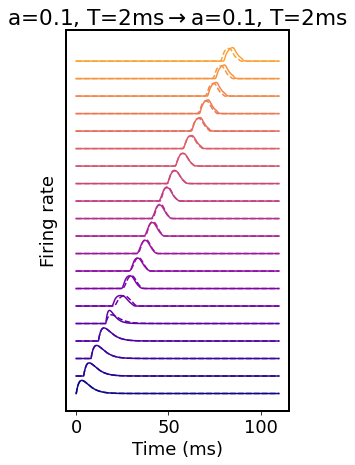

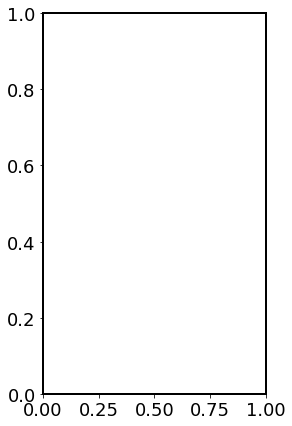

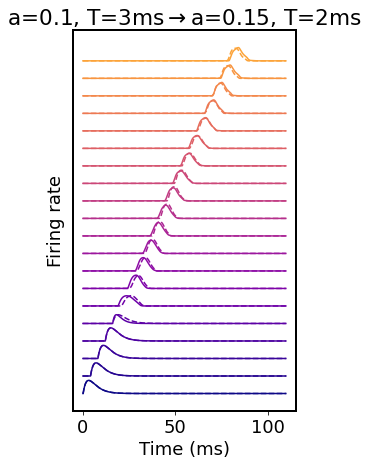

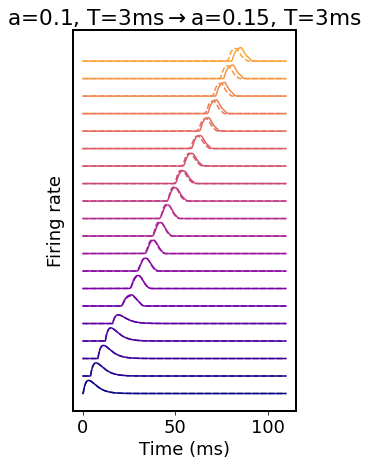

In [47]:
ic_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms']
fc_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms']

file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.05_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.1_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'
for idx_dir, dir_name in enumerate(sorted(glob.glob(file_regex))):
    plot_activities(dir_name, idx_dir, ic_tick_labels, fc_tick_labels, batch_idx=0)